In [17]:
### Si données locales
u.user <- read.csv(file='u.user.csv', sep='|', header=T)
u.item <- read.csv(file='u.item.csv', sep='|', header=T)
u.data <- read.csv(file='u.data.csv', sep='|', header=T)
library(Matrix)
m.sparse <- sparseMatrix(u.data[,1],u.data[,2],x=u.data[,3])
rownames(m.sparse) <- paste('u', 1:nrow(m.sparse), sep='')
colnames(m.sparse) <- paste('i', 1:ncol(m.sparse), sep='')
mae <- function(m1, m2) mean(abs(m1 - m2), na.rm=T)

m <- as.matrix(m.sparse)                # transforme en matrice ordinaire
m.na <- m
m.na[m.na==0] <- NA
mae.rmse <- function(m, m.hat) {
    return(list(mae=mean(abs(m - m.hat), na.rm=T), rmse=sqrt(mean((m - m.hat)^2, na.rm=T))))
}
new.m.mae.rmse <- function(dimRedu){
# matrice diagonale pour réduire les matrices originales
m.d2 <- diag(c(m.svd$d[1:dimRedu],rep(0,length(m.svd$d)-dimRedu)))
# nouvelle matrice basée sur les deux premières dimensions uniquement
m.svd2 <- round((m.svd$u %*% m.d2 %*% t(m.svd$v)),2)
mae.rmse(m.svd2, m)
    }

In [18]:
new.m.cv <- function(dimRedu){
# matrice diagonale pour réduire les matrices originales
m.d2 <- diag(c(m.svd$d[1:dimRedu],rep(0,length(m.svd$d)-dimRedu)))
# nouvelle matrice basée sur les deux premières dimensions uniquement
m.svd2 <- round((m.svd$u %*% m.d2 %*% t(m.svd$v)),2)+r.means
mae(m.svd2[i.test.b], m.na[i.test.b])
    }
to.plot <- c()

In [19]:
i.observed <- which(m > 0)
i.hasard <- sample(i.observed, length(i.observed))
length(i.hasard)
fold.size <- round(length(i.hasard) / 5)
i.false <- rep(FALSE, length(m))
for (i in seq_len(5)){
fold.number <- i

## Index booléen pour les cellules de test et d'entraînement
i.test.b <- i.false
## Les cellules indexées du replis correspondant sont fixées à TRUE pour le test...
i.test.b[ i.hasard[((fold.number-1) * fold.size):((fold.number) * fold.size)] ] <- TRUE
## ...et à FALSE pour l'entraînement
i.train.b <-  !i.test.b
m.train <- m
m.train[i.test.b] <- 0                # on enlève les données de test pour l'entraînement
m.train.na <- m.train
m.train.na[m.train==0]<-NA
    
u.mean <- matrix(rowMeans(m.train.na, na.rm=T), nrow(m), ncol(m))
item.mean <- matrix(colMeans(m.train.na, na.rm=T), nrow(m), ncol(m), byrow=T)
m.expect <- ((u.mean + item.mean)/2)
m.train.na[m.train==0] <-m.expect[m.train==0]

r.means <- rowMeans(m.train.na,na.rm=T)
m.train.na[!is.finite(m.train.na)]<- r.means
r.means <- rowMeans(m.train)
m.train.na <- m.train.na-r.means
m.svd <- svd(m.train.na)
to.plot<-rbind(to.plot,unlist(lapply(seq(22), new.m.cv)))
    }


[1] 100000

In [20]:
to.plot<-apply(to.plot,2,unlist)

In [21]:
to.plot

0.7938305,0.7809129,0.7702485,0.7697677,0.7682084,0.7667910,0.7649372,0.7624395,0.7622065,0.7621956,...,0.7618032,0.7615540,0.7616217,0.7619948,0.7616167,0.7620427,0.7627484,0.7631566,0.7634426,0.7635823
0.7811111,0.7691168,0.7583593,0.7575203,0.7560638,0.7536579,0.7524214,0.7507551,0.7495783,0.7497157,...,0.7488202,0.7491831,0.7496781,0.7501992,0.7503646,0.7506135,0.7507817,0.7509078,0.7512706,0.7515787
0.7841845,0.7714208,0.7610685,0.7601273,0.7586190,0.7572082,0.7563405,0.7540099,0.7540492,0.7529288,...,0.7524912,0.7526152,0.7523348,0.7520519,0.7519991,0.7516941,0.7521316,0.7529773,0.7534390,0.7537545
0.7899995,0.7774186,0.7671482,0.7667243,0.7653445,0.7643181,0.7624857,0.7608556,0.7606122,0.7605239,...,0.7590821,0.7590372,0.7592958,0.7597011,0.7598978,0.7601649,0.7604986,0.7606383,0.7608919,0.7614380
0.7887170,0.7767653,0.7658048,0.7653016,0.7643486,0.7624723,0.7615542,0.7594078,0.7583279,0.7581774,...,0.7580315,0.7587516,0.7590714,0.7588240,0.7592737,0.7596008,0.7595454,0.7594052,0.7594408,0.7593937


In [22]:
sdev <- apply(to.plot,2,sd) 
sdev
avg <- colMeans(to.plot)
x <- 1:length(avg)

[1] 0.004989750 0.004776784 0.004776019 0.004982567 0.005014467 0.005360409
 [7] 0.005068886 0.004923710 0.005140467 0.005244262 0.005195786 0.005307386
[13] 0.005271470 0.005130998 0.005111219 0.005131090 0.005080260 0.005267676
[19] 0.005339313 0.005228611 0.005140271 0.005103154

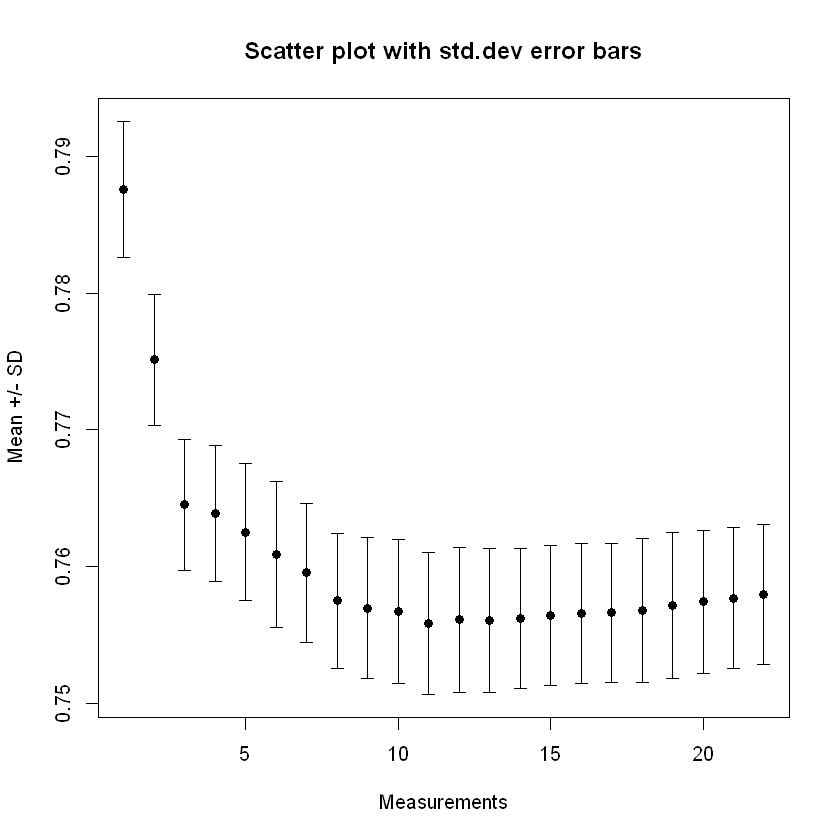

In [23]:
plot(x,colMeans(to.plot),ylim=range(c(avg-sdev, avg+sdev)),pch=19, xlab="Measurements", ylab="Mean +/- SD",
    main="Scatter plot with std.dev error bars"
)
# hack: we draw arrows but with very special "arrowheads"
arrows(x, avg-sdev, x, avg+sdev, length=0.05, angle=90, code=3)